In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [72]:
# Load the data

# get path to files
path = '/Users/simenguttormsen/Dropbox/SimenDuke/CompSci671/KaggleProject/cs-671-fall-2024-final-project/'

# load processed data
X_train = pd.read_csv(path + "X_train_processed.csv")
y_train = pd.read_csv(path + "y_train_processed.csv")

X_test = pd.read_csv(path + "X_test_processed.csv")
y_test = pd.read_csv(path + "y_test.csv")

X_competition = pd.read_csv(path + "X_competition_processed.csv")

# get id for competition set
id_competition = X_competition["id"]


# make sure the columns are the same and the same order
X_test = X_test[X_train.columns]
X_competition = X_competition[X_train.columns]

In [73]:
# Fill numerical missing values with median
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    X_train[col] = X_train[col].fillna(X_train[col].median())
    X_test[col] = X_test[col].fillna(X_train[col].median())
    X_competition[col] = X_competition[col].fillna(X_train[col].median())

# Fill categorical missing values with mode 
categorical_cols = X_train.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_value = X_train[col].mode().iloc[0]
    X_train[col] = X_train[col].fillna(mode_value)
    X_test[col] = X_test[col].fillna(mode_value)
    X_competition[col] = X_competition[col].fillna(mode_value)


# Scale data


In [503]:
# for the models that needs the data scaled

from sklearn.preprocessing import StandardScaler

# scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
X_competition_scaled = scaler.transform(X_competition)

# Convert y to 1d array
y_train_1d = y_train.values.ravel()
y_test_1d = y_test.values.ravel()

# Logistic Regression

In [75]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Fit logistic regression with increased max_iter
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train_1d)

training_predictions = model.predict(X_train_scaled)
training_accuracy = accuracy_score(y_train_1d, training_predictions)
print(f"Training Accuracy: {training_accuracy}")

val_predictions = model.predict(X_test_scaled)

print(val_predictions)

accuracy = accuracy_score(y_test_1d, val_predictions)
print(f"Accuracy: {accuracy}")

# print RMSE for train and validation set
from sklearn.metrics import mean_squared_error

training_rmse = mean_squared_error(y_train_1d, training_predictions, squared=False)
val_rmse = mean_squared_error(y_test_1d, val_predictions, squared=False)

print(f"Training RMSE: {training_rmse}")
print(f"Validation RMSE: {val_rmse}")

Training Accuracy: 0.5250617579089968
[0 5 5 ... 4 5 1]
Accuracy: 0.5012738853503185
Training RMSE: 1.071772880483188
Validation RMSE: 1.0655281875536364


# Decision Tree

In [76]:
# Implement Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


# Create a decision tree model
model = DecisionTreeClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# GridSearchCV with 5-fold cross-validation
tree_grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose = True)
print(tree_grid_search)
# Fit the model
tree_grid_search.fit(X_train, y_train_1d)


# Print the best parameters and the best score
print("Best parameters found: ", tree_grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}%".format(tree_grid_search.best_score_ * 100))

# RMSE for train and validation set
tree_training_predictions = tree_grid_search.predict(X_train)
tree_training_rmse = mean_squared_error(y_train_1d, tree_training_predictions, squared=False)
print(f"Training RMSE: {tree_training_rmse}")

tree_val_predictions = tree_grid_search.predict(X_test)
tree_val_rmse = mean_squared_error(y_test_1d, tree_val_predictions, squared=False)
print(f"Validation RMSE: {tree_val_rmse}")

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='neg_root_mean_squared_error', verbose=True)
Fitting 5 folds for each of 125 candidates, totalling 625 fits
Best parameters found:  {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 4}
Best cross-validation accuracy: -104.73%
Training RMSE: 0.8333532550013376
Validation RMSE: 1.0096666536993073


Validation Accuracy: 0.5321656050955414


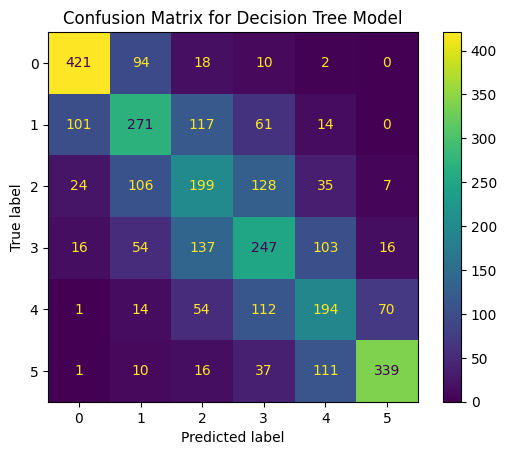

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# make confusion matrix for tree predictions
tree_val_predictions = tree_grid_search.predict(X_test)
tree_val_accuracy = accuracy_score(y_test_1d, tree_val_predictions)
print(f"Validation Accuracy: {tree_val_accuracy}")

confusion_matrix = confusion_matrix(y_test_1d, tree_val_predictions)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()

plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

# XGBoost

In [196]:
# install xgboost
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Show effects of hyperparameter num_estimators


100
200
300
400
500
600
700
800
900
1000


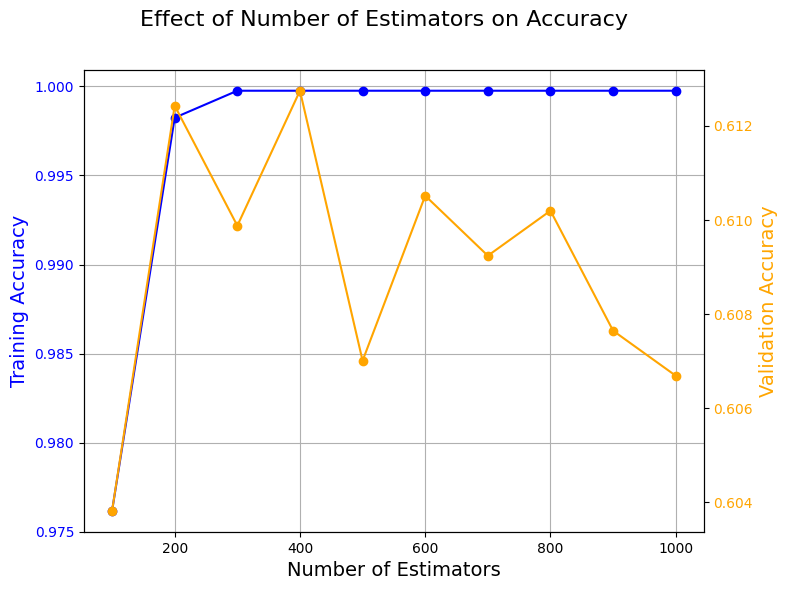

In [481]:
from sklearn.metrics import accuracy_score
import xgboost as xgb

num_estimators_values = [100,200,300, 400, 500,600, 700,800, 900, 1000]

accuracy_scores_train = []
accuracy_scores_test = []
for num_estimators in num_estimators_values:
    print(num_estimators)
    # Update the max_depth parameter
    model = xgb.XGBClassifier(
        n_estimators=num_estimators,
    )
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    y_pred_hyper_tarin = model.predict(X_train)
    accuracy_train = accuracy_score(y_train_1d, y_pred_hyper_tarin)
    accuracy_scores_train.append(accuracy_train)  
    # Predict on the validation set (or use cross-validation)
    y_pred_hyper_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test_1d, y_pred_hyper_test)
    accuracy_scores_test.append(accuracy_test)


# Plot the results with dual y-axes
fig, ax1 = plt.subplots(figsize=(8, 6))

# Primary y-axis for training accuracy
ax1.plot(num_estimators_values, accuracy_scores_train, marker='o', label='Training Accuracy', color='blue')
ax1.set_xlabel('Number of Estimators', fontsize=14)
ax1.set_ylabel('Training Accuracy', fontsize=14, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Secondary y-axis for validation accuracy
ax2 = ax1.twinx()
ax2.plot(num_estimators_values, accuracy_scores_test, marker='o', label='Validation Accuracy', color='orange')
ax2.set_ylabel('Validation Accuracy', fontsize=14, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and legend
fig.suptitle('Effect of Number of Estimators on Accuracy', fontsize=16)

plt.show()

# Now to the model hyperparameter tuning on XGBClassifier

Tune hyperparameters using a randomized cross validaiton search to test a span of values

In [440]:
from sklearn.model_selection import RandomizedSearchCV

xgb_model = xgb.XGBClassifier()

# Define parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 1, 5],
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5),
    'reg_alpha': [0, 0.01, 0.1, 1, 10],  
    'reg_lambda': [0.1, 1, 10, 100],     
}

# Perform randomized search
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, random_state=3)
random_search.fit(X_train, y_train)

# Output best parameters
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END colsample_bytree=0.6, gamma=5, learning_rate=0.20333333333333334, max_depth=5, min_child_weight=3, n_estimators=200, reg_alpha=0.01, reg_lambda=10, subsample=0.6; total time=   1.8s
[CV] END colsample_bytree=0.6, gamma=5, learning_rate=0.20333333333333334, max_depth=5, min_child_weight=3, n_estimators=200, reg_alpha=0.01, reg_lambda=10, subsample=0.6; total time=   1.8s
[CV] END colsample_bytree=0.6, gamma=5, learning_rate=0.20333333333333334, max_depth=5, min_child_weight=3, n_estimators=200, reg_alpha=0.01, reg_lambda=10, subsample=0.6; total time=   1.8s
[CV] END colsample_bytree=0.6, gamma=5, learning_rate=0.20333333333333334, max_depth=5, min_child_weight=3, n_estimators=200, reg_alpha=0.01, reg_lambda=10, subsample=0.6; total time=   1.9s
[CV] END colsample_bytree=0.6, gamma=5, learning_rate=0.20333333333333334, max_depth=5, min_child_weight=3, n_estimators=200, reg_alpha=0.01, reg_lambda=10, subsample=0.6; t

Check metrics of the best model

In [441]:
# Retrieve the best model

best_params_xg = random_search.best_params_
best_model_xg = xgb.XGBClassifier(**best_params_xg)
best_model_xg.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_xg = best_model_xg.predict(X_test)
y_train_pred_xg = best_model_xg.predict(X_train)

# Make predictions on the competition set
y_competition_pred_xg = best_model_xg.predict(X_competition)

print(f"Best n_estimators: {best_model_xg.get_params()['n_estimators']}")
print(f"Best learning rate: {best_model_xg.get_params()['learning_rate']}")
print(f"Best gamma: {best_model_xg.get_params()['gamma']}")
print(f"Best max_depth: {best_model_xg.get_params()['max_depth']}")
print(f"Best min_child_weight: {best_model_xg.get_params()['min_child_weight']}")
print(f"Best subsample: {best_model_xg.get_params()['subsample']}")
print(f"Best colsample_bytree: {best_model_xg.get_params()['colsample_bytree']}")
print(f"Best reg_alpha: {best_model_xg.get_params()['reg_alpha']}")
print(f"Best reg_lambda: {best_model_xg.get_params()['reg_lambda']}")
print("\n")

# Evaluate the model's performance
train_accuracy_xg = accuracy_score(y_train, y_train_pred_xg)
print(f"Training Accuracy: {100*train_accuracy_xg:.3f}%")

val_accuracy_xg = accuracy_score(y_test, y_val_pred_xg)
print(f"Test Accuracy: {100*val_accuracy_xg:.3f}%")

# print RMSE of training and validation set
rmse_train_xg = mean_squared_error(y_train, y_train_pred_xg, squared=False)
print(f"Training RMSE: {rmse_train_xg}")

rmse_val_xg = mean_squared_error(y_test, y_val_pred_xg, squared=False)
print(f"Validation RMSE: {rmse_val_xg}")

Best n_estimators: 300
Best learning rate: 0.3
Best gamma: 0
Best max_depth: 7
Best min_child_weight: 5
Best subsample: 0.9
Best colsample_bytree: 0.8
Best reg_alpha: 0
Best reg_lambda: 10


Training Accuracy: 99.888%
Test Accuracy: 60.987%
Training RMSE: 0.033400999134259236
Validation RMSE: 0.8588245559102248


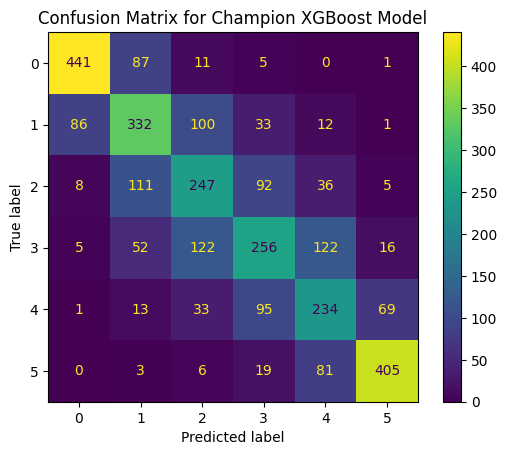

In [442]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
confusion_matrix_xg = confusion_matrix(y_test_1d, y_val_pred_xg)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_xg)
disp.plot()

plt.title('Confusion Matrix for Champion XGBoost Model')
plt.show()

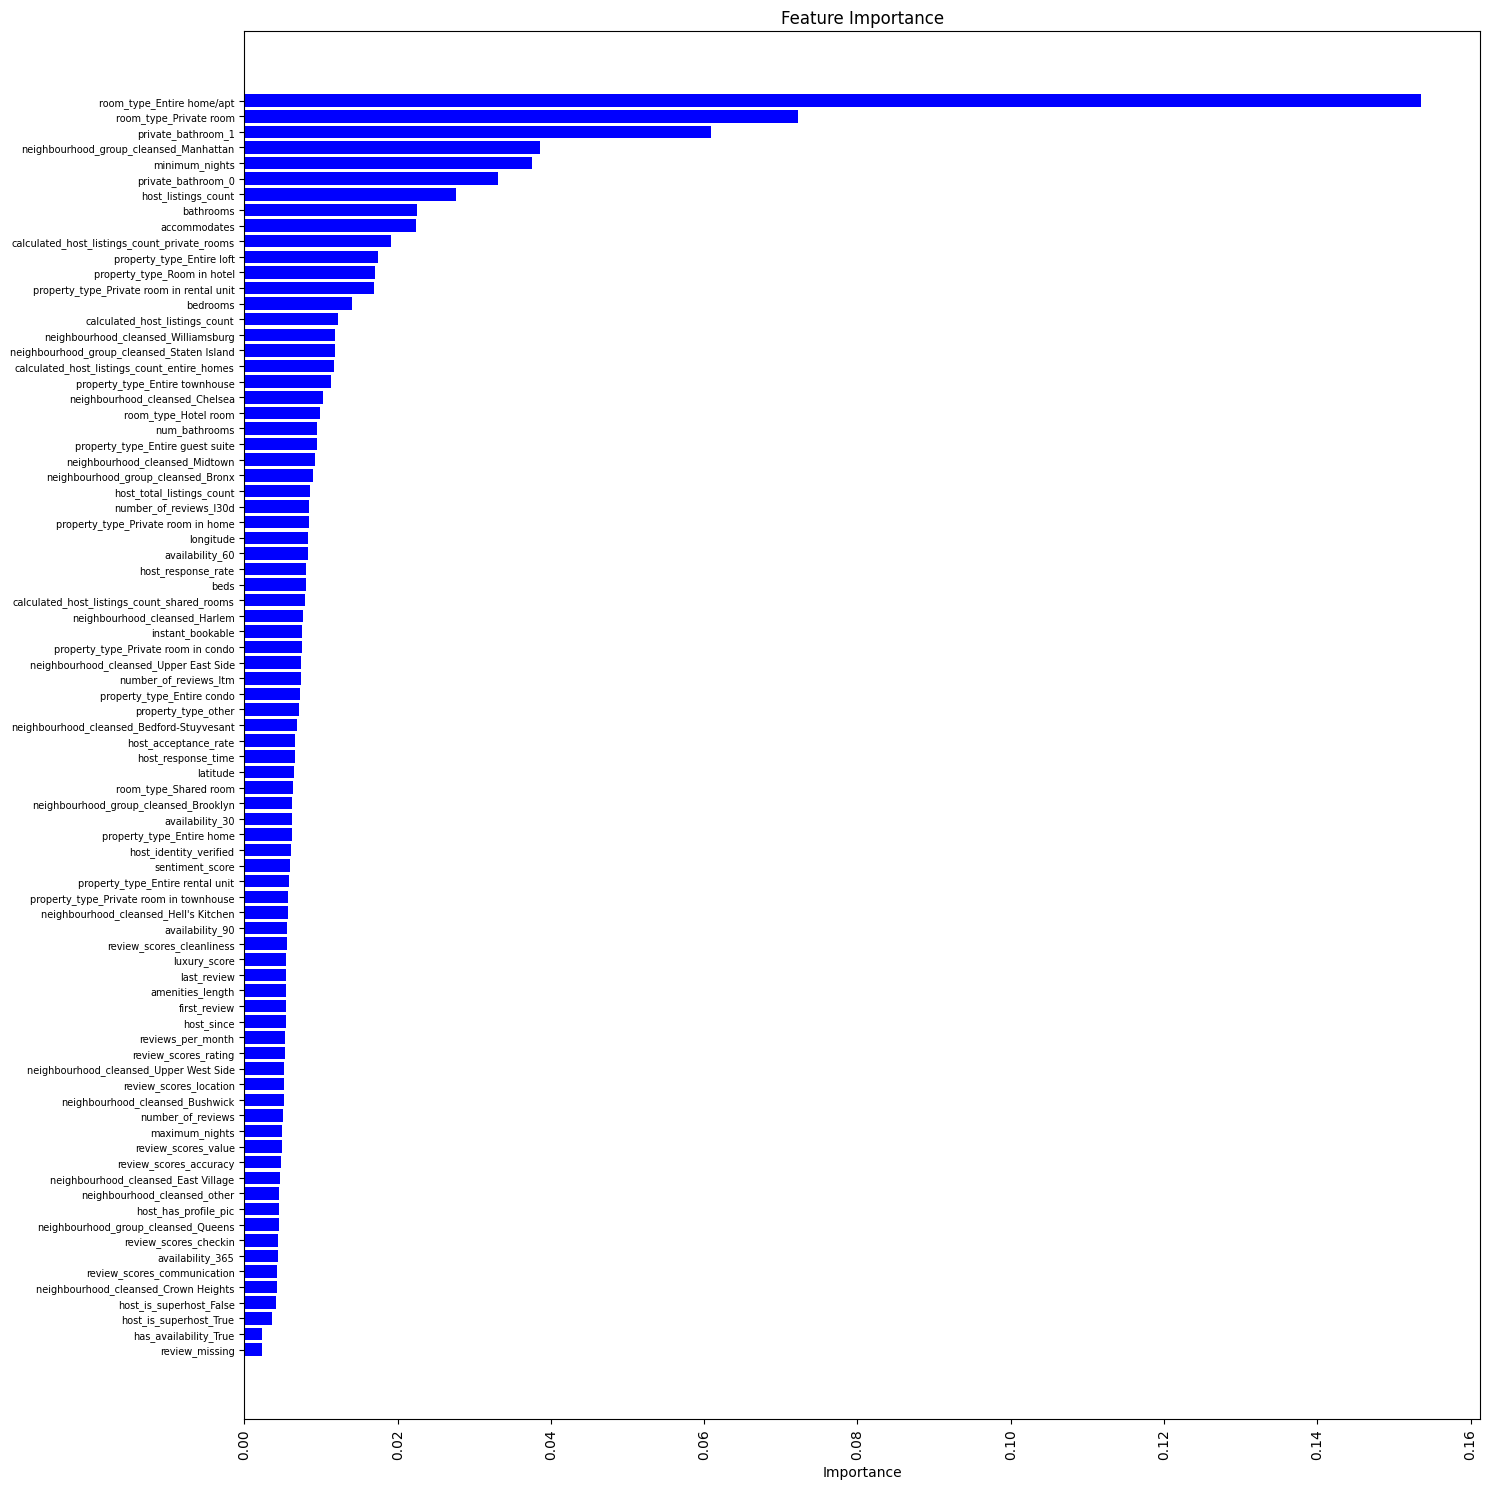

In [495]:
# get feature importance
feature_importance_xg = best_model_xg.feature_importances_
feature_names = X_train.columns

# plot feature importance in ascending order
plt.figure(figsize=(15, 15))
sorted_idx = feature_importance_xg.argsort()
plt.barh(feature_names[sorted_idx], feature_importance_xg[sorted_idx], color='blue')
plt.xlabel('Importance', fontsize=10)  
plt.title('Feature Importance', fontsize=12)  
plt.xticks(rotation=90, fontsize=10) 
plt.yticks(fontsize=7)
plt.tight_layout()
plt.show()

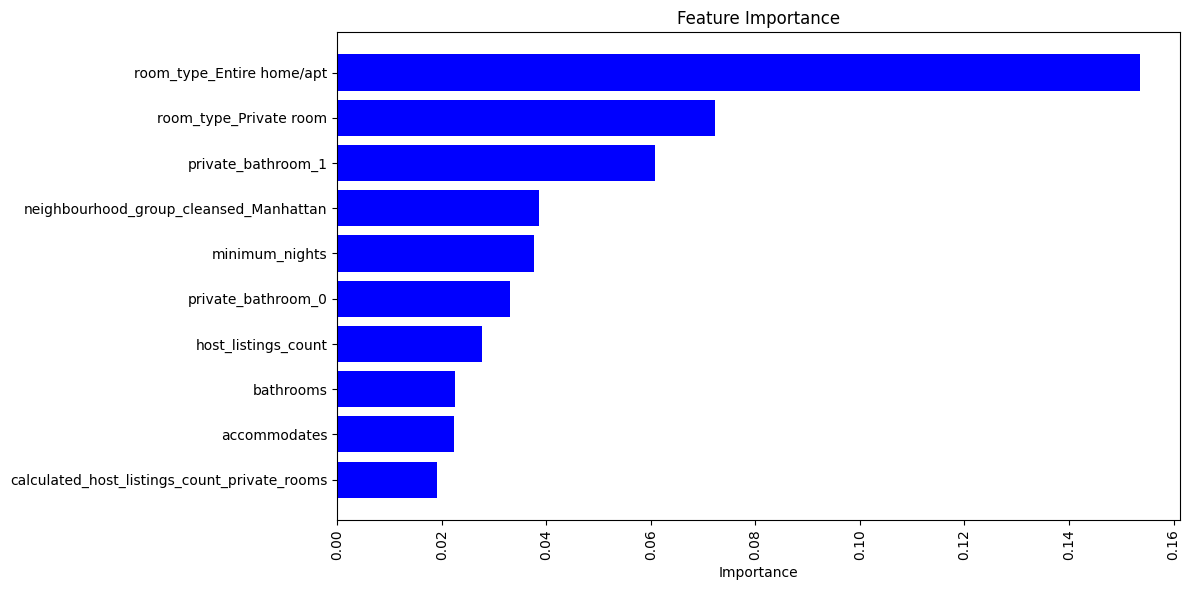

In [502]:
# get feature importance
feature_importance_xg = best_model_xg.feature_importances_
feature_names = X_train.columns

# plot just the first 10 features

# plot feature importance in ascending order
plt.figure(figsize=(12,6))
sorted_idx = feature_importance_xg.argsort()
plt.barh(feature_names[sorted_idx][-10:], feature_importance_xg[sorted_idx][-10:], color='blue')
plt.xlabel('Importance', fontsize=10)  
plt.title('Feature Importance', fontsize=12)  
plt.xticks(rotation=90, fontsize=10) 
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Ensemble BagginGregressor

In [444]:
xgboost_champion = xgb.XGBClassifier(**best_params)
xgboost_champion

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [461]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

# Define the BaggingRegressor using the optimized XGBoost model
bagging_model = BaggingRegressor(
    estimator=xgboost_champion,
)

# Define hyperparameter grid for Bagging
param_grid_bagging = {
    'n_estimators': [10,20],        # Number of models in the ensemble
    'max_samples': [0.8, 1.0],     # Fraction of samples for each model
    'max_features': [0.8, 1.0],     # Fraction of features for each model
}

# Grid search for Bagging
grid_search_bagging = GridSearchCV(
    estimator=bagging_model,
    param_grid=param_grid_bagging,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit to training data
grid_search_bagging.fit(X_train, y_train_1d)

# Extract the best Bagging model
best_bagging = grid_search_bagging.best_estimator_
print("Best Parameters for Bagging:", grid_search_bagging.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END .max_features=0.8, max_samples=0.8, n_estimators=10; total time= 1.3min
[CV] END .max_features=0.8, max_samples=0.8, n_estimators=10; total time= 1.3min
[CV] END .max_features=0.8, max_samples=1.0, n_estimators=10; total time= 1.3min
[CV] END .max_features=0.8, max_samples=0.8, n_estimators=10; total time= 1.3min
[CV] END .max_features=0.8, max_samples=1.0, n_estimators=10; total time= 1.4min
[CV] END .max_features=0.8, max_samples=0.8, n_estimators=20; total time= 2.8min
[CV] END .max_features=0.8, max_samples=0.8, n_estimators=20; total time= 2.8min
[CV] END .max_features=0.8, max_samples=1.0, n_estimators=10; total time= 1.5min
[CV] END .max_features=0.8, max_samples=0.8, n_estimators=20; total time= 2.8min
[CV] END .max_features=1.0, max_samples=0.8, n_estimators=10; total time= 1.9min
[CV] END .max_features=0.8, max_samples=1.0, n_estimators=20; total time= 3.1min
[CV] END .max_features=0.8, max_samples=1.0, n_es

In [469]:
# Extract the best parameters from GridSearchCV
best_params_grid = grid_search_bagging.best_params_

# Create a new BaggingRegressor with the best parameters
optimized_bagging_xgb = BaggingRegressor(
    base_estimator=xgboost_champion,
    n_estimators=best_params_grid['n_estimators'],
    max_samples=best_params_grid['max_samples'],
    max_features=best_params_grid['max_features'],
    bootstrap=True,
)

# Retrain the model on the entire training dataset
optimized_bagging_xgb.fit(X_train, y_train)

y_train_pred_bagging = np.rint(optimized_bagging_xgb.predict(X_train)).astype(int)
y_val_pred_bagging = np.rint(optimized_bagging_xgb.predict(X_test)).astype(int)
y_competition_pred_bagging = np.rint(optimized_bagging_xgb.predict(X_competition)).astype(int)

# Evaluate the model's performance
train_accuracy_bagging = accuracy_score(y_train, y_train_pred_bagging)
print(f"Training Accuracy: {100*train_accuracy_bagging:.3f}%")

val_accuracy_bagging = accuracy_score(y_test, y_val_pred_bagging)
print(f"Test Accuracy: {100*val_accuracy_bagging:.3f}%")

# print RMSE of training and validation set
rmse_train_baging = mean_squared_error(y_train, y_train_pred_bagging, squared=False)
print(f"Training RMSE: {rmse_train_xg}")

rmse_val_bagging = mean_squared_error(y_test, y_val_pred_bagging, squared=False)
print(f"Validation RMSE: {rmse_val_bagging}")

Training Accuracy: 90.884%
Test Accuracy: 62.261%
Training RMSE: 0.033400999134259236
Validation RMSE: 0.7803314663988818


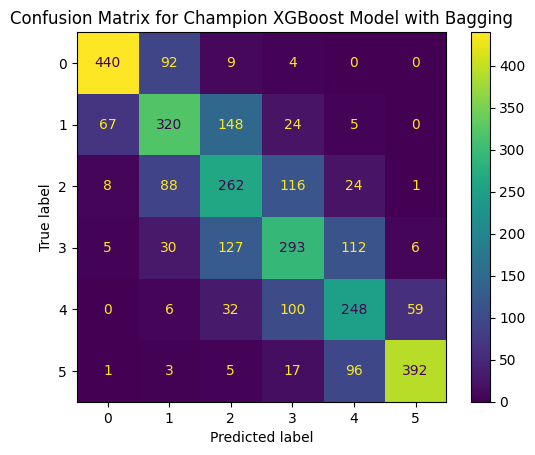

In [485]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
confusion_matrix_xg = confusion_matrix(y_test_1d, y_val_pred_bagging)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_xg)
disp.plot()

plt.title('Confusion Matrix for Champion XGBoost Model with Bagging')
plt.show()

# Random Forest

In [180]:
# Implement Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error

# Define the random grid
random_grid = {
    'bootstrap': [True],  # Focus on bootstrap sampling to reduce variance
    'max_depth': [10, 20, 30, 40, None],  # Control tree depth
    'min_samples_leaf': [2, 5, 10],  # Prevent splits with very few samples
    'min_samples_split': [5, 10, 15],  # Require a higher minimum split size
    'max_features': ['sqrt', 'log2', None],  # Limit features for decorrelation
    'n_estimators': [200, 400, 600, 800]  # Control the ensemble size
}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
# Define the pipeline with scaling and model
rf_random_grid = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=1, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the pipeline
rf_random_grid.fit(X_train, y_train_1d)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   4.5s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   4.6s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   4.6s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   4.6s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   4.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   8.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estima

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20, 30, 40, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [5, 10, 15],
                                        'n_estimators': [200, 400, 600, 800]},
                   random_state=1, scoring='neg_mean_squared_error', verbose=2)

In [188]:
# Implement Random Forest
from sklearn.ensemble import RandomForestClassifier

champion_rf = RandomForestClassifier(**rf_random_grid.best_params_)
champion_rf.fit(X_train, y_train_1d)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=800)

In [189]:
# Predict on the validation set using RF
rf_val_predictions = champion_rf.predict(X_test)
rf_competition_predictions = champion_rf.predict(X_competition)

# Calculate accuracy for RF
rf_accuracy = accuracy_score(y_test_1d, rf_val_predictions)
print(f"Validation Accuracy for RF: {rf_accuracy}")

# training RMSE for RF
rf_training_predictions = champion_rf.predict(X_train)
rf_training_rmse = mean_squared_error(y_train_1d, rf_training_predictions, squared=False)
print(f"Training RMSE for RF: {rf_training_rmse}")

# Calculate RMSE for RF
rf_val_rmse = mean_squared_error(y_test_1d, rf_val_predictions, squared=False)
print(f"Validation RMSE for RF: {rf_val_rmse}")

Validation Accuracy for RF: 0.6140127388535032
Training RMSE for RF: 0.2383637478246098
Validation RMSE for RF: 0.8538037782299545


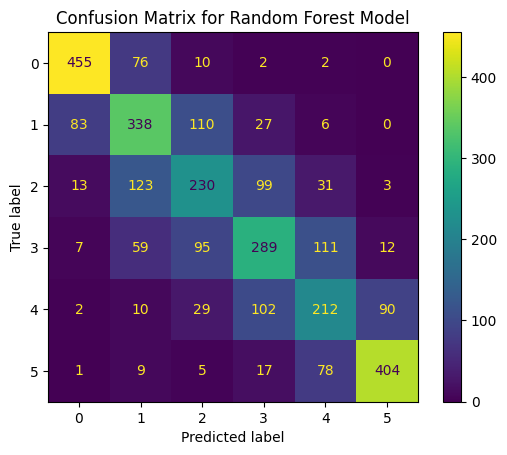

In [190]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
confusion_matrix = confusion_matrix(y_test_1d, rf_val_predictions)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()

plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# Make submission file for Kaggle


In [35]:
# submission for XGBoost
submission_df = pd.DataFrame({"id": id_competition, "price": y_competition_pred_xg})
submission_df.to_csv(path + "submission_xg.csv", index=False)

In [282]:
# submission for Bagging with XGBoost
submission_df = pd.DataFrame({"id": id_competition, "price": y_competition_pred_bagging})
submission_df.to_csv(path + "submission_bagging4.csv", index=False)

In [36]:
# submission for Random Forest
submission_df = pd.DataFrame({"id": id_competition, "price": rf_competition_predictions})
submission_df.to_csv(path + "submission_rf.csv", index=False)